In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: ylabel='price_per_sqft'>

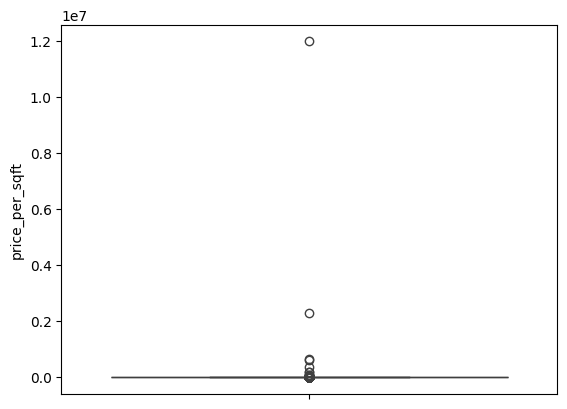

In [4]:
 sns.boxplot(df['price_per_sqft'])

## from the boxplot ,it is clear that outliers are present.

In [5]:
df.price_per_sqft.mean()

7920.336742424242

In [6]:
df.price_per_sqft.median()

5438.0

### There is a  difference between mean and median,it shows the presence of outliers

In [7]:
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3107.85
0.10     3500.00
0.25     4267.00
0.50     5438.00
0.75     7317.00
0.90    11666.00
0.92    12857.00
0.94    14394.80
0.96    16500.00
0.98    20000.00
0.99    23674.45
Name: price_per_sqft, dtype: float64

### There is a significant difference between 98th and 99th percentile,indicating outliers.

In [8]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)] #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [9]:
#Data without outliers
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\3498113794.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

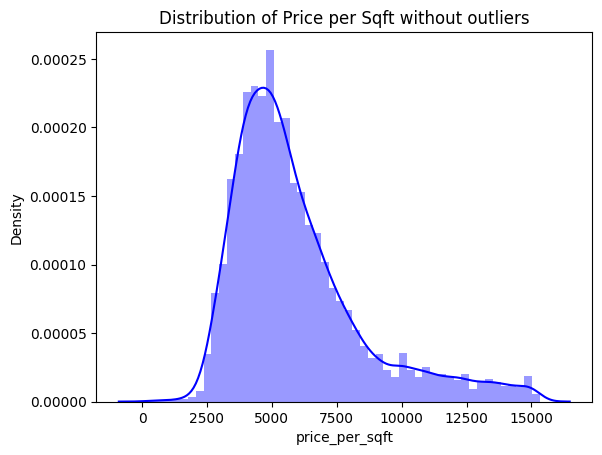

In [10]:
sns.distplot(df1['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers')

### A bell shaped curve in distplot indicates outliers are removed

In [11]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df1))
print("Outliers:",len(df)-len(df1))

Before removing outliers: 13200
After removing outliers: 12540
Outliers: 660


#2.Percentile method

In [16]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 15312.099999999984
lower limit: 3107.8500000000004


In [17]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [18]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\2091313857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

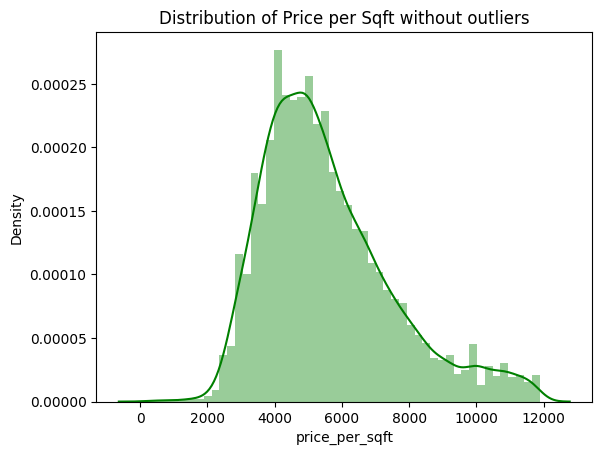

In [62]:
sns.distplot(df2['price_per_sqft'],color='g')
plt.title('Distribution of Price per Sqft without outliers')

In [19]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 13200
After removing outliers: 11880
Outliers: 1320


# CAPPING -change the outliers to upper or lower values
new_df=df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

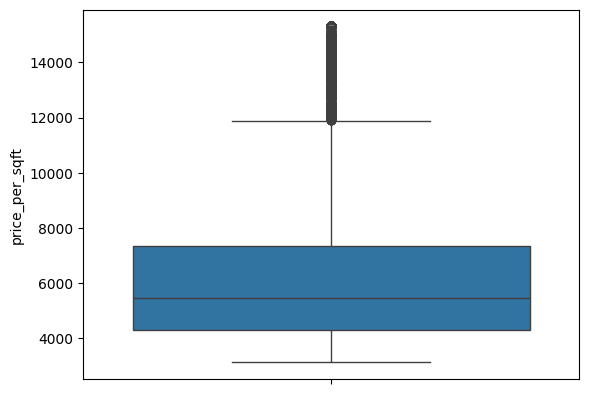

In [22]:
sns.boxplot(new_df['price_per_sqft'])

3.IQR METHOD

In [23]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4267.0
Q3= 7317.0
IQR= 3050.0


In [24]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)

Lower Whisker= -308.0
Upper Whisker= 11892.0


In [25]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_whisker) | (df['price_per_sqft']<lower_whisker)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [28]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_whisker) & (df['price_per_sqft']>=lower_whisker)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\3757078890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='y')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

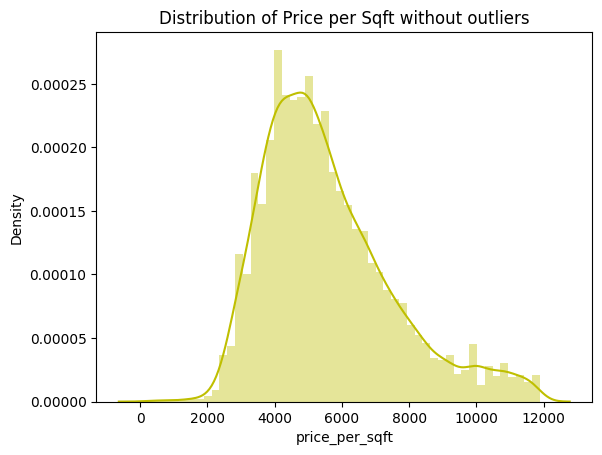

In [61]:
sns.distplot(df2['price_per_sqft'],color='y')
plt.title('Distribution of Price per Sqft without outliers')

In [29]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 13200
After removing outliers: 11935
Outliers: 1265


In [30]:
#CAPPING -change the outliers to upper or lower values
new_df=df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_whisker),'price_per_sqft']=upper_whisker
new_df.loc[(new_df['price_per_sqft']<lower_whisker),'price_per_sqft']=lower_whisker

<Axes: ylabel='price_per_sqft'>

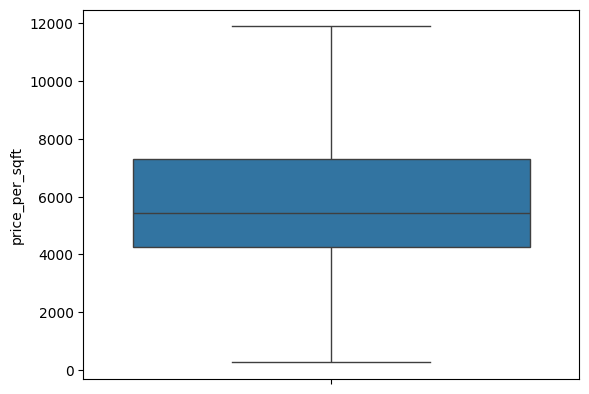

In [31]:
sns.boxplot(new_df['price_per_sqft'])

In [32]:
#4.Normal Distribution

In [33]:
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [34]:
sd=df.price_per_sqft.std()
sd

106727.16032810867

In [35]:
#+3sigma
mean+3*sd

328101.8177267502

In [36]:
#-3sigma
mean-3*sd

-312261.14424190175

In [37]:
#finding outliers
df[(df.price_per_sqft<(mean-3*sd)) | (df.price_per_sqft>(mean+3*sd))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [39]:
#data without outliers
df4=df[(df.price_per_sqft>(mean-3*sd)) & (df.price_per_sqft<(mean+3*sd))]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\4082923001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

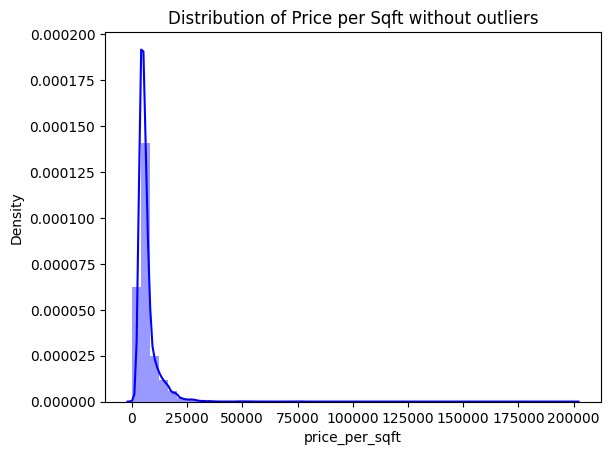

In [59]:
sns.distplot(df4['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers')

In [40]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before removing outliers: 13200
After removing outliers: 13195
Outliers: 5


Five outliers were removed.

<Axes: ylabel='price_per_sqft'>

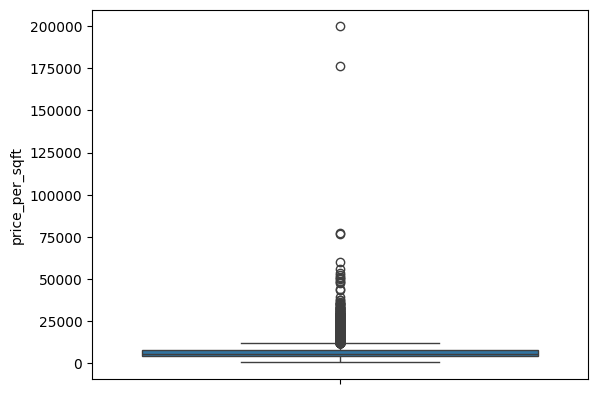

In [41]:
sns.boxplot(df4['price_per_sqft'])

#5.zscoremethod

In [43]:
upper_limit=df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit=df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()

In [44]:
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 328101.8177267502
lower limit: -312261.14424190175


In [45]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [46]:
#deleting the outliers
df5=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\3767445983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

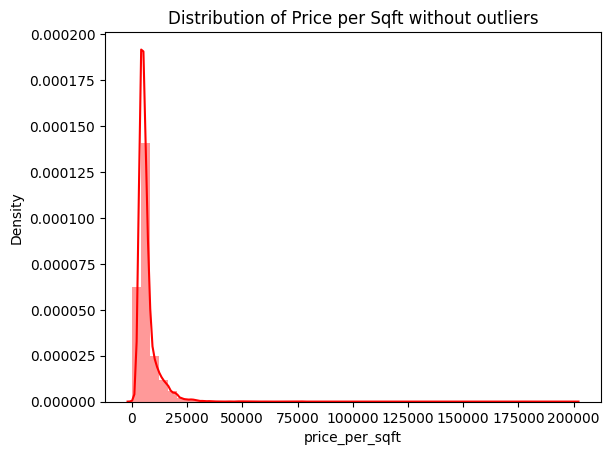

In [60]:
sns.distplot(df5['price_per_sqft'],color='r')
plt.title('Distribution of Price per Sqft without outliers')

In [47]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df5))
print("Outliers:",len(df)-len(df5))

Before removing outliers: 13200
After removing outliers: 13195
Outliers: 5


In [48]:
#CAPPING -change the outliers to upper or lower values
new_df=df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\jinto\AppData\Local\Temp\ipykernel_16436\323113076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

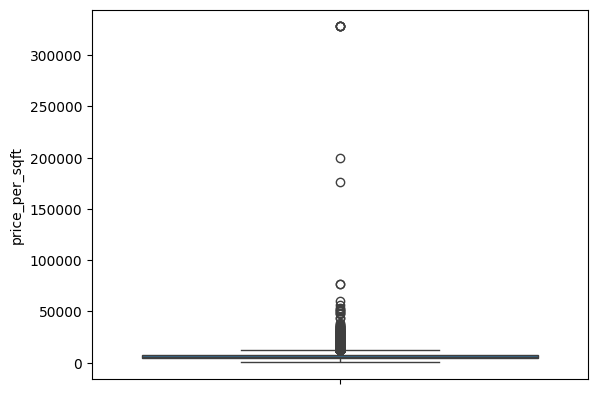

In [49]:
sns.boxplot(new_df['price_per_sqft'])

CORRELATION BETWEEN ALL NUMERICAL COLUMNS

In [50]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
numcol=df.select_dtypes(include=['int', 'float']).columns
numcol

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [54]:
#compute correlation matrix
corr_matrix=df[numcol].corr()

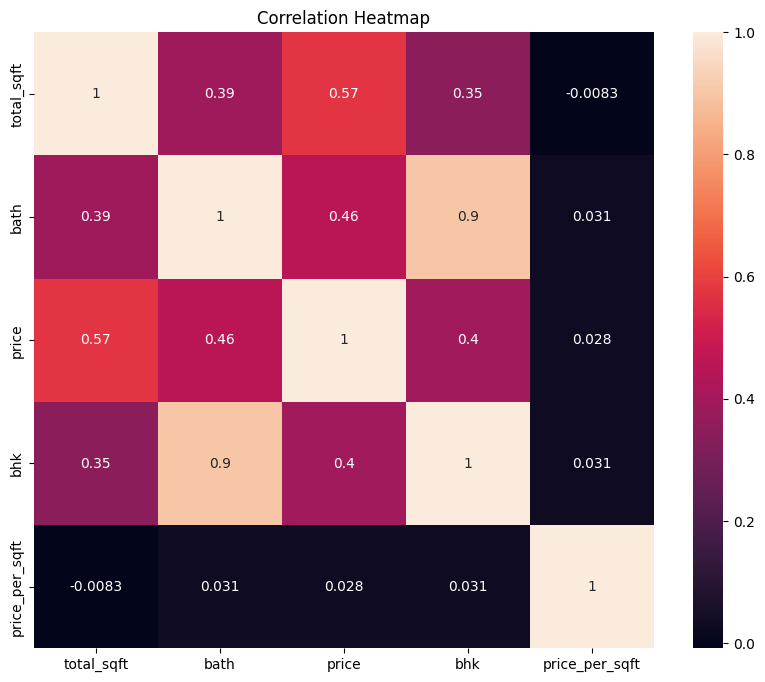

In [55]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

- There is a negative correlation between total_sqft and price_per_sqft.That is there is no linear relationship between them.But all other features have a moderate correlation with the total_sqft.
- Bath has a strong correlation with the bhk 
- Price also has a small linear relationship with other features
- Correlation matrix shows how each feature related with each other and obtain an insight of how these features affect in property price.

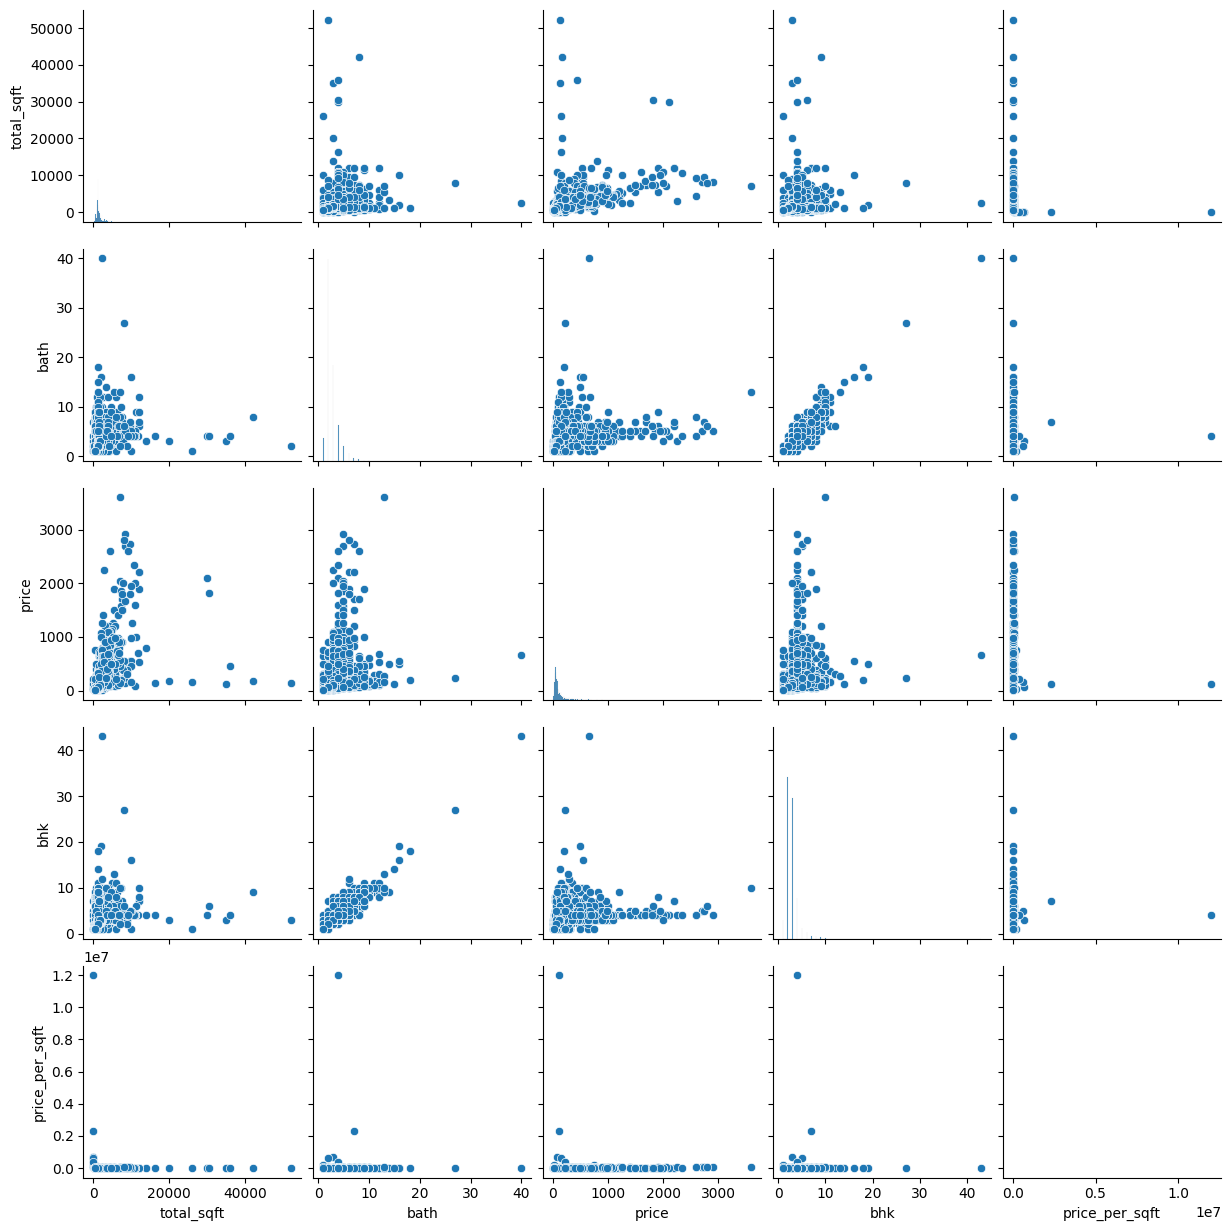

In [56]:
#plot scatterplot
sns.pairplot(df)
plt.show()